In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing The Models in Sciket-Learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR



# Importing Usefull Operators in Sciket-Learn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb

In [2]:
df_train = pd.read_csv(r'train_dataset.csv')
df_test = pd.read_csv(r'test_dataset.csv')


In [3]:
df_train.shape

(1017, 26)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [5]:
df_train.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'actual_productivity'],
      dtype='object')

In [6]:
df_train.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003


In [7]:
df_train.isnull().sum()

team                       0
targeted_productivity      0
smv                        0
wip                      423
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
month                      0
quarter_Quarter1           0
quarter_Quarter2           0
quarter_Quarter3           0
quarter_Quarter4           0
quarter_Quarter5           0
department_finishing       0
department_finishing       0
department_sweing          0
day_Monday                 0
day_Saturday               0
day_Sunday                 0
day_Thursday               0
day_Tuesday                0
day_Wednesday              0
actual_productivity        0
dtype: int64

In [8]:
df_train.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
count,1017.000000,1017.000000,1017.000000,594.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,...,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,6.443461,0.730747,15.150492,1183.183502,4532.940020,40.689282,0.564405,0.398230,0.160275,34.846116,...,0.201573,0.214356,0.584071,0.161259,0.152409,0.164208,0.165192,0.171091,0.185841,0.736509
std,3.472473,0.097384,10.946096,1793.836719,3275.997333,173.240655,10.093731,3.351712,0.440199,22.185292,...,0.401373,0.410577,0.493124,0.367950,0.359594,0.370647,0.371536,0.376774,0.389169,0.174304
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233705
25%,3.000000,0.700000,3.940000,770.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.651515
50%,7.000000,0.750000,15.260000,1039.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773333
75%,9.000000,0.800000,24.260000,1254.750000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850170
max,12.000000,0.800000,54.560000,23122.000000,15120.000000,3600.000000,270.000000,45.000000,2.000000,89.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.108125


# **Replacing the missing values with mean**

In [9]:
df_train["wip"]=df_train["wip"].fillna(df_train["wip"].mean()) 

# Checking for the distribution of data

In [10]:
# In order to guage maximum productivity in actual
px.histogram(df_train['actual_productivity'],nbins=100,title='Actual Productivity Gained In General',width=800,height=400)

# Checking for the correlation

In [11]:
corrMatrix = df_train.corr()
#fig, ax = plt.subplots(figsize=(20,20)) # Sample figsize in inches
#sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
px.density_heatmap(corrMatrix,title='Correlation Matrix',width=800,height=400)

# Convert correlation matrix to 1-D Series and sort

In [12]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corrMatrix.unstack().sort_values()
pd.set_option('display.max_rows', None) 
sorted_mat.tail(100)

actual_productivity    quarter_Quarter1         0.082608
quarter_Quarter1       actual_productivity      0.082608
month                  idle_men                 0.086587
idle_men               month                    0.086587
quarter_Quarter1       targeted_productivity    0.086722
targeted_productivity  quarter_Quarter1         0.086722
actual_productivity    wip                      0.087362
wip                    actual_productivity      0.087362
idle_men               quarter_Quarter3         0.090700
quarter_Quarter3       idle_men                 0.090700
no_of_style_change     quarter_Quarter3         0.090840
quarter_Quarter3       no_of_style_change       0.090840
department_finishing   incentive                0.094254
incentive              department_finishing     0.094254
idle_men               department_sweing        0.100313
department_sweing      idle_men                 0.100313
wip                    quarter_Quarter1         0.108699
quarter_Quarter1       wip     

# Box plot

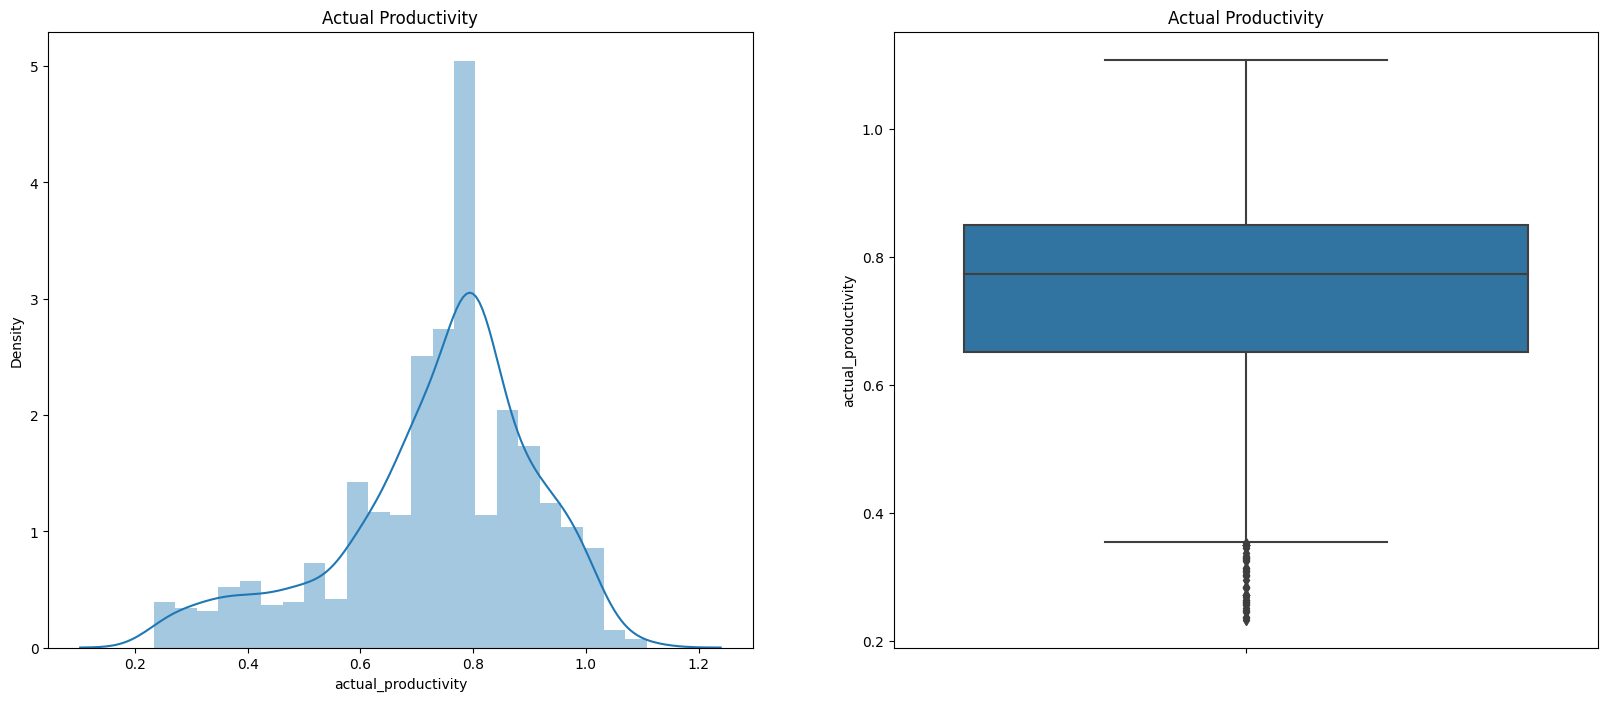

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Actual Productivity')
sns.distplot(df_train.actual_productivity)

plt.subplot(1,2,2)
plt.title('Actual Productivity')
sns.boxplot(y=df_train.actual_productivity)


plt.show()

In [14]:
X= df_train.iloc[:,:-1]
y = df_train["actual_productivity"]

In [15]:
X.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,9,0.75,3.94,1183.183502,960,0,0.0,0,0,8.0,...,0,1,0,0,0,0,0,0,0,1
1,7,0.65,30.10,909.000000,7080,0,0.0,0,1,59.0,...,0,0,0,1,0,0,0,1,0,0
2,3,0.80,4.15,1183.183502,1440,0,0.0,0,0,7.0,...,0,0,1,0,0,0,0,0,0,1
3,1,0.65,22.53,762.000000,5040,0,0.0,0,1,42.0,...,0,0,0,1,0,0,0,0,0,1
4,4,0.70,30.10,767.000000,3300,50,0.0,0,1,57.0,...,0,0,0,1,1,0,0,0,0,0


In [16]:
y.head()

0    0.755167
1    0.535678
2    0.820833
3    0.581131
4    0.790003
Name: actual_productivity, dtype: float64

In [17]:
X.shape

(1017, 25)

In [18]:
y.shape

(1017,)

In [19]:
X.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64

# ***Algorithms***

In [20]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
rfr = RandomForestRegressor()
svr = SVR()

In [21]:
for clf in (lr,knr, dtr,rfr,svr ):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print("R2 Scored of ", clf.__class__.__name__, r2_score(y_pred, y))

R2 Scored of  LinearRegression -1.2265606807967804
R2 Scored of  KNeighborsRegressor -0.33338838704006135
R2 Scored of  DecisionTreeRegressor 1.0
R2 Scored of  RandomForestRegressor 0.9023981671900302
R2 Scored of  SVR -14.86104077007237


> R2 score showed the following order of models as per their effectiveness.

> DecisionTreeRegressor (1.0) > RandomForestRegressor 0.90 >KNeighborsRegressor -0.34 > KNeighborsRegressor -0.34

**Mean Squared Error of the algorithms**

In [22]:
from sklearn.metrics import mean_squared_error  ,r2_score
for clf in (lr,knr, dtr,rfr,svr ):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print("Mean Square Error of ", clf.__class__.__name__, mean_squared_error(y_pred, y))

Mean Square Error of  LinearRegression 0.02094504591376525
Mean Square Error of  KNeighborsRegressor 0.016849722870148895
Mean Square Error of  DecisionTreeRegressor 3.0057384540131965e-33
Mean Square Error of  RandomForestRegressor 0.0022475081623665625
Mean Square Error of  SVR 0.028574282530029742


From the above code
- It can be seen that the Random forest Regressor is the most suitable with the least MSE value of 0.0021. 

# Lazy Predictor

In [23]:
from lazypredict.Supervised import LazyRegressor

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [25]:
clf = LazyRegressor(verbose=0)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:46<00:00,  1.11s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.28,0.37,0.14,0.15
HistGradientBoostingRegressor,0.23,0.33,0.15,0.90
LGBMRegressor,0.22,0.31,0.15,0.15
RandomForestRegressor,0.20,0.30,0.15,0.58
AdaBoostRegressor,0.16,0.27,0.16,0.08
ExtraTreesRegressor,0.15,0.25,0.16,0.48
BaggingRegressor,0.14,0.24,0.16,0.07
XGBRegressor,0.06,0.17,0.17,0.71
NuSVR,0.06,0.17,0.17,0.09


Lazy regressor shows the result of 42 different regressors.

#  Apply to Top algorithms

In [26]:
Gr = GradientBoostingRegressor()
Hgr = HistGradientBoostingRegressor()
Ada = AdaBoostRegressor()
knr = KNeighborsRegressor()
xbgi = xgb.XGBRegressor
Lgbmr = lgb.LGBMRegressor

In [27]:
print("GradientBoostingRegressor")
Gr.fit(X, y)
y_pred = Gr.predict(X)
MSEGr=mean_squared_error(y_pred, y)
print('MSE for GradientBoostingRegressor	: ', MSEGr)
R2Gr=r2_score(y_pred, y)
print('R2 for GradientBoostingRegressor	: ', R2Gr)


print(" HistGradientBoostingRegressor")
Hgr.fit(X, y)
y_pred = Hgr.predict(X)
MSEHGr=mean_squared_error(y_pred, y)
print('MSE HistGradientBoostingRegressor	: ', MSEHGr)
R2HGr=r2_score(y_pred, y)
print('R2 for HistGradientBoostingRegressor	: ', R2HGr)

print('AdaBoostRegressor')
Ada.fit(X, y)
y_pred = Ada.predict(X)
MSEada=mean_squared_error(y_pred, y)
print('MSE for AdaBoostRegressor	: ', MSEada)
R2ada=r2_score(y_pred, y)
print('R2 for AdaBoostRegressor	: ', R2ada)

print('KNeighborsRegressor')
knr.fit(X, y)
y_pred = knr.predict(X)
MSEknr=mean_squared_error(y_pred, y)
print('MSE for KNeighborsRegressor: ', MSEknr)
R2knr=r2_score(y_pred, y)
print('R2 for KNeighborsRegressor: ', R2knr)

GradientBoostingRegressor
MSE for GradientBoostingRegressor	:  0.009968464773837726
R2 for GradientBoostingRegressor	:  0.40081288774684987
 HistGradientBoostingRegressor
MSE HistGradientBoostingRegressor	:  0.005142214241329054
R2 for HistGradientBoostingRegressor	:  0.7550591906283303
AdaBoostRegressor
MSE for AdaBoostRegressor	:  0.017702745336277317
R2 for AdaBoostRegressor	:  -0.9013303124771135
KNeighborsRegressor
MSE for KNeighborsRegressor:  0.016849722870148895
R2 for KNeighborsRegressor:  -0.33338838704006135


# XGBRegressor

In [28]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(X, y)
 
# Predict the model
pred = xgb_r.predict(X)
 
#MSE Computation
xgbmse = mean_squared_error(y, pred)
xgbrsqure = r2_score(y, pred)
print("MSE through XGB : % f" %(xgbmse))
print("r-squre through XGB :" ,(xgbrsqure))

[09:51:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MSE through XGB :  0.006668
r-squre through XGB : 0.7803255374455028


# LGBM Regressor

In [29]:
# laoding data
lgb_train = lgb.Dataset(X, y)
lgb_eval = lgb.Dataset(X, y, reference=lgb_train) 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
} 
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l1: 0.127922	valid_0's l2: 0.0282535
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 0.122034	valid_0's l2: 0.0263989
[3]	valid_0's l1: 0.117153	valid_0's l2: 0.024942
[4]	valid_0's l1: 0.112736	valid_0's l2: 0.0235107
[5]	valid_0's l1: 0.108789	valid_0's l2: 0.0222592
[6]	valid_0's l1: 0.105522	valid_0's l2: 0.0212824
[7]	valid_0's l1: 0.102278	valid_0's l2: 0.0204109
[8]	valid_0's l1: 0.0984187	valid_0's l2: 0.0192975
[9]	valid_0's l1: 0.0963369	valid_0's l2: 0.0186523
[10]	valid_0's l1: 0.0934049	valid_0's l2: 0.0178066
[11]	valid_0's l1: 0.0917797	valid_0's l2: 0.0173144
[12]	valid_0's l1: 0.0893338	valid_0's l2: 0.016696
[13]	valid_0's l1: 0.0871029	valid_0's l2: 0.0161097
[14]	valid_0's l1: 0.0852937	valid_0's l2: 0.0156372
[15]	valid_0's l1: 0.0838521	valid_0's l2: 0.0152506
[16]	valid_0's l1: 0.0826386	valid_0's l2: 0.0149532
[17]	valid_0's l1: 0.0817139	valid_0's l2: 0.0146534
[1

In [30]:
# prediction
y_pred = model.predict(X)

# accuracy check
LGBmse = mean_squared_error(y, y_pred)
LGBrmse =LGBmse**(0.5)
LGBrsquare = r2_score(y, y_pred)
print("MSE: %.2f" % LGBmse)
print("RMSE: %.2f" % LGBrmse) 
print("R Square:" , LGBrsquare)

MSE: 0.01
RMSE: 0.09
R Square: 0.7052952709945355


# Comparing models using Mean Squared Error and R Squared Error

In [31]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Regressor','Ada Boost Regressor','Gradient Boosting Regressor','hist gradient Boosting Regressor', 'XgBoost','LGBM'],
    'R2Score' : [R2knr, R2ada, R2Gr, R2HGr, xgbrsqure, LGBrsquare],
    "Mean Square Error":[MSEknr,MSEada,MSEGr,MSEHGr,xgbmse,LGBmse]
})


models.sort_values(by = 'R2Score', ascending = False)

,Model,R2Score,Mean Square Error
4,XgBoost,0.78,0.01
3,hist gradient Boosting Regressor,0.76,0.01
5,LGBM,0.71,0.01
2,Gradient Boosting Regressor,0.40,0.01
0,Random Forest Regressor,-0.33,0.02
1,Ada Boost Regressor,-0.90,0.02


In [32]:
import plotly.express as px
px.bar(data_frame= models, x = 'R2Score', y = 'Model', color = 'Mean Square Error', template = 'plotly_dark', title = 'Models Comparison')

XGBoost was found to be the most efficient of all the other models we explored so far. Hist gradient boosting regressor > LGBM > Gradient boosting model.

In [33]:
import joblib

joblib.dump(Gr, 'Gr.pkl')
joblib.dump(Hgr, 'Hgr.pkl')
joblib.dump(Ada, 'Ada.pkl')
joblib.dump(knr, 'knr.pkl')
joblib.dump(xgb_r, 'xgb_r.pkl')


['xgb_r.pkl']

In [34]:
def load_xgb_model():
    xgb_r = joblib.load('xgb_r.pkl')
    return xgb_r

In [35]:
model = load_xgb_model()
model.predict(X)

array([0.72515154, 0.5832543 , 0.80184925, ..., 0.75324637, 0.8814321 ,
       0.8224587 ], dtype=float32)

In [38]:
print(X_test.columns.to_list())

['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing', 'department_finishing ', 'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday']


In [39]:
X_test.shape

(204, 25)

In [44]:
import numpy as np
for i in X_test.select_dtypes(include = np.number).columns.to_list():
    print(i, f'{X_test[i].min()} - {X_test[i].max()}')

team 1 - 12
targeted_productivity 0.35 - 0.8
smv 2.9 - 50.48
wip 10.0 - 21266.0
over_time 0 - 15120
incentive 0 - 3600
idle_time 0.0 - 3.5
idle_men 0 - 15
no_of_style_change 0 - 2
no_of_workers 2.0 - 59.5
month 1 - 3
quarter_Quarter1 0 - 1
quarter_Quarter2 0 - 1
quarter_Quarter3 0 - 1
quarter_Quarter4 0 - 1
quarter_Quarter5 0 - 1
department_finishing 0 - 1
department_finishing  0 - 1
department_sweing 0 - 1
day_Monday 0 - 1
day_Saturday 0 - 1
day_Sunday 0 - 1
day_Thursday 0 - 1
day_Tuesday 0 - 1
day_Wednesday 0 - 1


In [45]:
for i in X_test.select_dtypes(include = 'object').columns.to_list():
    print(i, f'{X_test[i].unique()}')